# Exploration of Spotify API Data
## Setting Up Notebook

In [1]:
# import modules
import prepare
import preprocessing

# libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# reading current data into df variable
df = pd.read_csv('full-playlist.csv', index_col=0)

In [3]:
# removing nulls in release date, songs that only have year and not month or day are filled with 01
df = prepare.handle_nulls(df)

In [4]:
# drop observations with any null values, in this case only one
df = df.dropna()

In [5]:
# add features for converted duration, if featured artist in song, and release date split into columns by year, month, and day
df = preprocessing.create_features(df)

In [6]:
# looking at initial df
df.head()

,artist,album,release_date,track_name,track_id,danceability,energy,key,loudness,mode,...,time_signature,explicit,popularity,disc_number,duration_seconds,duration_minutes,is_featured_artist,release_year,release_month,release_day
0,tay-k,trapman,2020-07-12,trapman,6mecZbKK3JDeMdFRNxsCV5,0.792,0.594,2.0,-8.544,1.0,...,4.0,True,43.0,1.0,232.803,3.880050,False,2020,07,12
1,lil wyte,doubt me now,2003-03-04,oxy cotton,5PtMwNq8Dp31uYdGGacVJE,0.816,0.578,9.0,-6.912,1.0,...,4.0,True,61.0,1.0,193.920,3.232000,False,2003,03,04
2,kamelen,kingpin slim,2019-11-29,kingpin o.g - remix,6s8EhlBn2PIoESylkXnwYc,0.649,0.798,0.0,-6.450,0.0,...,4.0,True,22.0,1.0,254.390,4.239833,False,2019,11,29
3,waka flocka flame,flockaveli,2010-10-01,grove st. party (feat. kebo gotti),2e9EZ2V5QGGZPMJacO3y0Y,0.705,0.702,0.0,-4.783,0.0,...,4.0,True,62.0,1.0,250.493,4.174883,True,2010,10,01
4,project pat,mista don't play: everythangs workin',2001-02-13,don't save her (feat. crunchy black),3ZRd5Z0fiYtASLdEPPb16m,0.838,0.793,11.0,-5.470,0.0,...,4.0,True,45.0,1.0,261.933,4.365550,True,2001,02,13


In [7]:
# splitting into train, validate, test to explore on train only
train, validate, test = preprocessing.split_df(df)

train shape:  (4262, 26) , validate shape:  (1203, 26) , test shape:  (608, 26)

train percent:  70.0 , validate percent:  20.0 , test percent:  10.0


In [8]:
# looking at train df
train.head()

,artist,album,release_date,track_name,track_id,danceability,energy,key,loudness,mode,...,time_signature,explicit,popularity,disc_number,duration_seconds,duration_minutes,is_featured_artist,release_year,release_month,release_day
5491,yfn lucci,wet (she got that…),2020-02-14,wet (she got that…),4GurWpxvH3NoWz9f9wirPq,0.695,0.642,1.0,-6.130,0.0,...,4.0,True,76.0,1.0,209.848,3.497467,False,2020,02,14
2402,nelly,best of nelly,2009-01-01,ride wit me,5x2TDyeeTpf0riUoQDrvsV,0.850,0.707,7.0,-6.507,1.0,...,4.0,True,58.0,1.0,291.933,4.865550,False,2009,01,01
156,tay-k,#santanaworld (+),2017-12-14,megaman,6ikgPqC9vhkduTdIpsqYdj,0.744,0.314,8.0,-8.871,1.0,...,4.0,True,59.0,1.0,133.000,2.216667,False,2017,12,14
1698,method man,tical (deluxe edition),2014-09-16,i'll be there for you/you're all i need to get...,6C3yPXYG2NJYlIYVe5J7hv,0.722,0.745,4.0,-6.059,0.0,...,4.0,False,60.0,2.0,309.947,5.165783,False,2014,09,16
2892,promoting sounds,hit the floor,2020-10-30,hit the floor,7MUW9VPYDM00UdwF1csfCq,0.787,0.502,9.0,-5.119,0.0,...,4.0,True,60.0,1.0,117.394,1.956567,False,2020,10,30


# Visualizing Release Date vs. Popularity

In [9]:
# sorting by oldest year first, keeps original index of train but resorted
train_sort_date = train.sort_values(by=['release_date'])

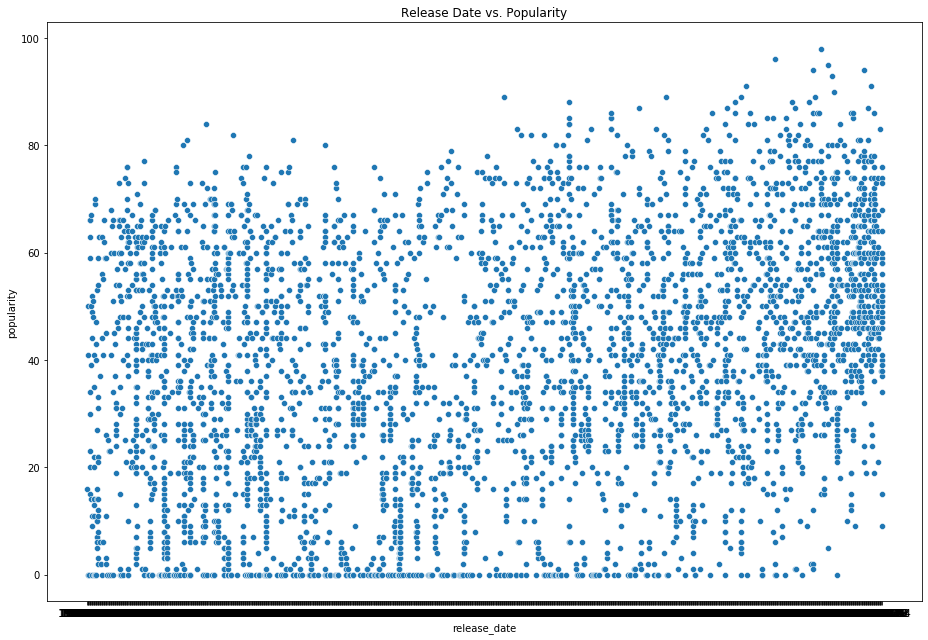

In [10]:
# visualizing each observation by release date and popularity
plt.figure(figsize=(13,9))

sns.scatterplot(x=train_sort_date.release_date, y=train_sort_date.popularity)
plt.title('Release Date vs. Popularity')

plt.tight_layout()

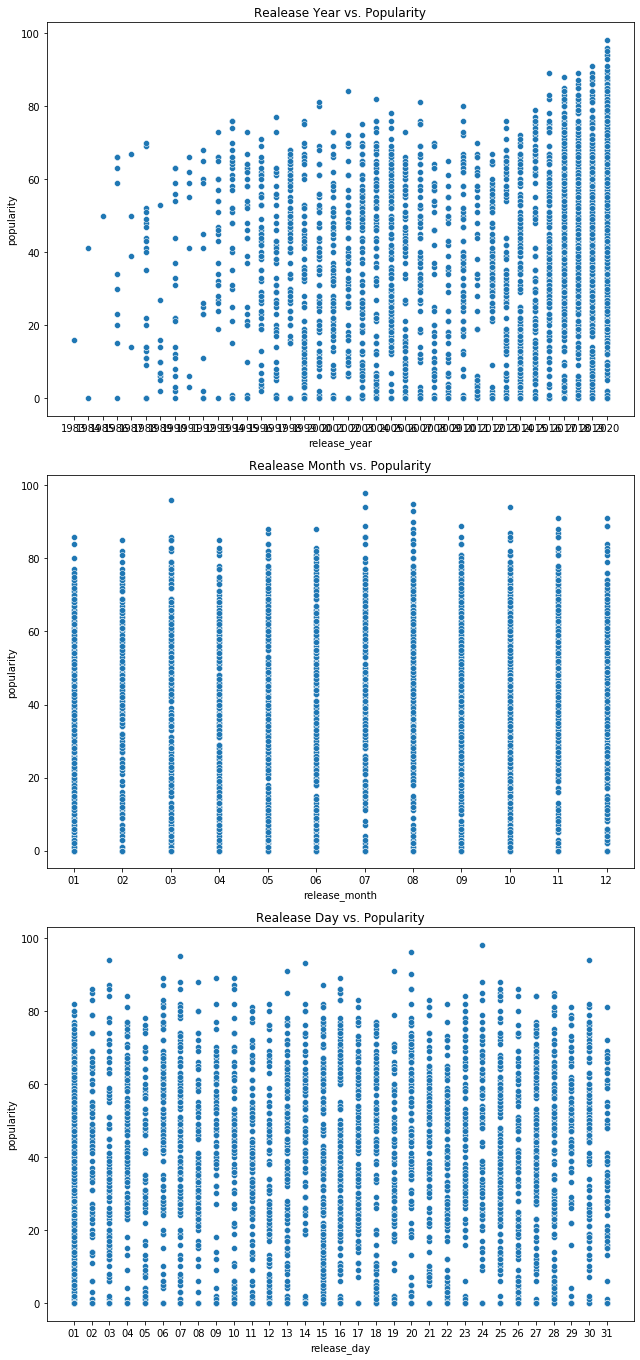

In [11]:
# visualzing release date split by year, month, and day
plt.figure(figsize=(9,19))

plt.subplot(3,1,1)

# sorting by oldest year first, keeps original index
train_sort_year = train.sort_values(by=['release_year'])
sns.scatterplot(x=train_sort_year.release_year, y=train_sort_year.popularity)
plt.title('Realease Year vs. Popularity')

plt.subplot(3,1,2)
# sorting by lowest month first, keeps original index
train_sort_month = train.sort_values(by=['release_month'])
sns.scatterplot(x=train_sort_month.release_month, y=train_sort_month.popularity)
plt.title('Realease Month vs. Popularity')

plt.subplot(3,1,3)
# sorting by lowest day first, keeps original index
train_sort_day = train.sort_values(by=['release_day'])
sns.scatterplot(x=train_sort_day.release_day, y=train_sort_day.popularity)
plt.title('Realease Day vs. Popularity')

plt.tight_layout()

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


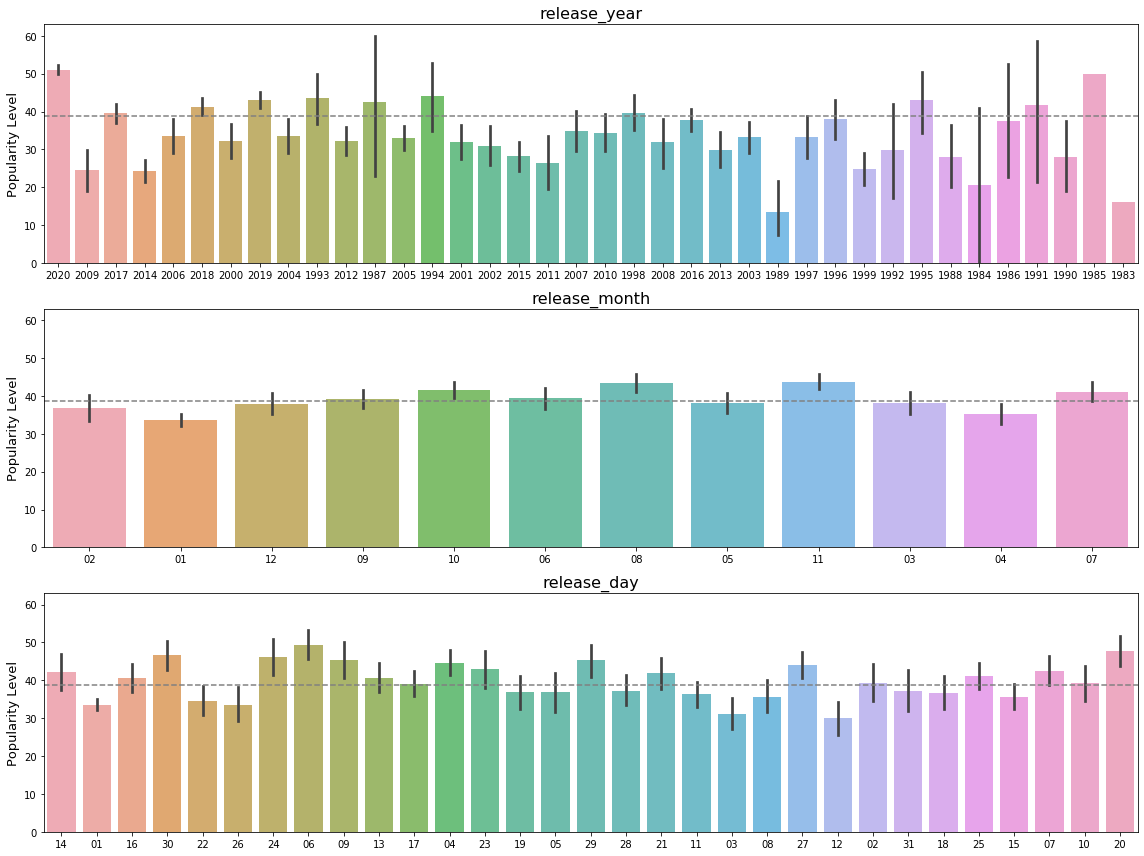

In [12]:
# visualizing average popularity by each features category
features = ['release_year', 'release_month', 'release_day']

# to plot reference line of overall train average popularity
survival_rate = train.popularity.mean()

# plots the average of each features subgroups as bar plots
_, ax = plt.subplots(nrows=3, ncols=1, figsize=(16, 12), sharey=True)
for i, feature in enumerate(features):
    
    sns.barplot(feature, 'popularity', data=train, ax=ax[i], alpha=.8)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Popularity Level', size=13)
    ax[i].set_title(feature, size=16)
    ax[i].axhline(survival_rate, ls='--', color='grey')
    plt.tight_layout()

It appears a song release year influences popularity more than the specific day. Songs released recently and in a few older years visually look to be more popular than older songs. Why do some days appear significantly above/below the average? Could it be more observations were released on these days?
- Will statistical testing reflect release year influencing popularity? 
- Would binning the release year help to visualize this (though will cost granularity)?

## Binning Release Year

In [13]:
# will bin popularity by 5 equal parts
train['popularity_bins'] = pd.qcut(train.popularity, 5)

In [14]:
# the values from binning
pd.qcut(train.popularity, 5).value_counts()

(-0.001, 16.0]    874
(16.0, 33.0]      858
(33.0, 47.0]      856
(60.0, 98.0]      852
(47.0, 60.0]      822
Name: popularity, dtype: int64

5 equal-ish bins from popularity in order (note: no songs from train reach 100)
- (-0.001, 21.6]
- (21.6, 44.0]
- (44.0, 55.0]
- (55.0, 66.0]
- (66.0, 96.0]

In [15]:
train['release_year'] = train.release_year.astype('int')

Next, will create bins for year release date

In [16]:
# will bin release_year by 6 equal parts
train['release_year_bins'] = pd.qcut(train.release_year, 6, duplicates='drop', labels=['1983_2003','2004_2011','2012_2016','2017_2018','2019_2020'])

pandas qcut duplicates parameter
- duplicates{default ‘raise’, ‘drop’}, optional
- If bin edges are not unique, raise ValueError or drop non-uniques.

In [17]:
# the values from binning
pd.qcut(train.release_year, 6, duplicates='drop').value_counts()

(2018.0, 2020.0]      1349
(1982.999, 2003.0]     798
(2011.0, 2016.0]       723
(2016.0, 2018.0]       716
(2003.0, 2011.0]       676
Name: release_year, dtype: int64

Next, will visualize the interaction of year with popularity using the binned features

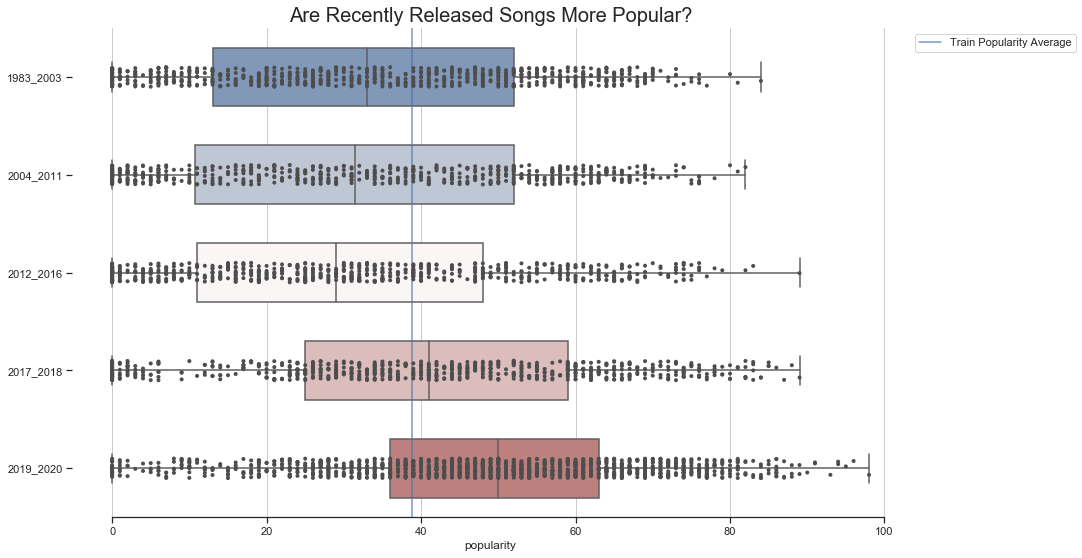

In [76]:
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(15, 9))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="popularity", y="release_year_bins", data=train,
            whis=[0, 100], width=.6, palette="vlag")

# reference line for overall popularity average
plt.axvline(train.popularity.mean(), alpha=.75, label='Train Popularity Average')

plt.title('Are Recently Released Songs More Popular?', size=20)

# Add in points to show each observation
sns.stripplot(x="popularity", y="release_year_bins", data=train,
              size=4, color=".3", linewidth=0)

plt.legend(bbox_to_anchor=(1,1), loc="upper left")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

## Binning Year by Decade

In [19]:
# bins set edge points for range of label
# goes from 1980-1989, 1990-1999, 2000-2009, 2019-2019, 2020-2029
train['decade'] = pd.cut(x=train.release_year, 
                             bins=[1979,1989,1999,2009,2019,2029], 
                             labels=['80s','90s','2000s','2010s','2020s'])

In [20]:
train.decade.value_counts()

2010s    1975
2020s     949
2000s     875
90s       408
80s        55
Name: decade, dtype: int64

In [21]:
# sanity checking each decade by value counts
train[train[['release_date','decade']].decade == '2000s'].release_date.value_counts(ascending=True)

2009-01-27     1
2007-10-30     1
2006-08-07     1
2006-10-03     1
2003-10-07     1
              ..
2002-01-01    32
2001-01-01    36
2005-01-01    47
2006-01-01    54
2004-01-01    58
Name: release_date, Length: 217, dtype: int64

In [22]:
train[train[['release_date','decade']].decade == '2010s'].sort_values(by=['release_date'])

,artist,album,release_date,track_name,track_id,danceability,energy,key,loudness,mode,...,disc_number,duration_seconds,duration_minutes,is_featured_artist,release_year,release_month,release_day,popularity_bins,release_year_bins,decade
735,scarface,greatest hits,2010-01-01,smile,2wxO3ZydJTZRi4Bbc02q7i,0.700,0.402,5.0,-9.930,0.0,...,1.0,300.600,5.010000,False,2010,01,01,"(60.0, 98.0]",2004_2011,2010s
2952,nicki minaj,pink friday (deluxe),2010-01-01,did it on’em,4qhhB1wqCRU5BBzotRGov3,0.559,0.414,9.0,-7.032,0.0,...,1.0,212.347,3.539117,False,2010,01,01,"(47.0, 60.0]",2004_2011,2010s
1889,drake,thank me later (int'l version),2010-01-01,best i ever had,1GxHeBvQ9935Dd3cSfsfBa,0.431,0.894,5.0,-2.673,0.0,...,1.0,258.760,4.312667,False,2010,01,01,"(60.0, 98.0]",2004_2011,2010s
490,master p,starring master p,2010-01-01,how ya do dat,7hvH1I5xjWJJdmdNqmIoq2,0.832,0.390,1.0,-9.953,1.0,...,1.0,268.573,4.476217,False,2010,01,01,"(-0.001, 16.0]",2004_2011,2010s
217,nicki minaj,pink friday (deluxe),2010-01-01,roman's revenge,7eK3fdGXCmhGfE8dKtETQU,0.802,0.947,10.0,-2.868,1.0,...,1.0,276.173,4.602883,False,2010,01,01,"(33.0, 47.0]",2004_2011,2010s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4389,darkoo,gangsta (remix),2019-12-27,gangsta,3OI3RthBVGGbNCp1ZySLoF,0.708,0.649,0.0,-7.961,1.0,...,1.0,216.000,3.600000,False,2019,12,27,"(16.0, 33.0]",2019_2020,2010s
398,jackboys,jackboys,2019-12-27,what to do? (feat. don toliver),4AO1XhrgJczQ9bNVxdfKQe,0.643,0.594,9.0,-5.191,0.0,...,1.0,250.142,4.169033,True,2019,12,27,"(60.0, 98.0]",2019_2020,2010s
1171,jackboys,jackboys,2019-12-27,highest in the room (feat. rosalía & lil baby)...,7h0d2h0fUmzbs7zeFigJPn,0.559,0.491,2.0,-6.406,0.0,...,1.0,244.874,4.081233,True,2019,12,27,"(60.0, 98.0]",2019_2020,2010s
5659,elias,i guess?,2019-12-27,i guess?,235m3adTb5WObAJWOonO4f,0.758,0.844,10.0,-6.738,0.0,...,1.0,194.674,3.244567,False,2019,12,27,"(47.0, 60.0]",2019_2020,2010s


/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


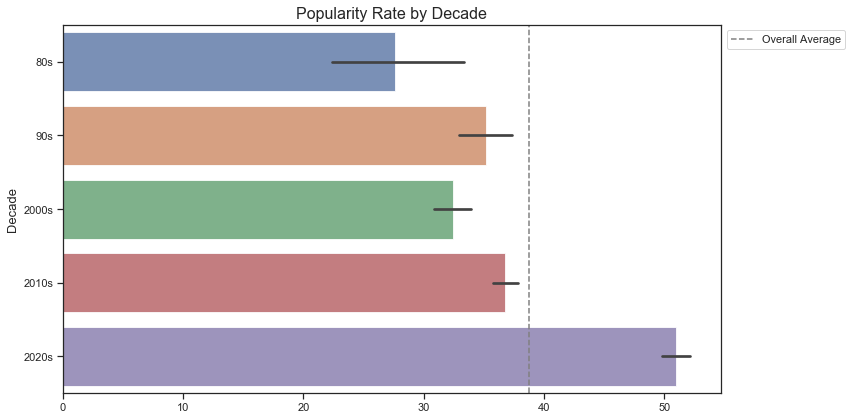

In [52]:
# to plot reference line of overall train average popularity
popularity_rate = train.popularity.mean()

plt.figure(figsize=(12,6))

# plots the average of each features subgroups as bar plots
sns.barplot('popularity', 'decade', data=train, alpha=.8)
plt.xlabel('')
plt.ylabel('Decade', size=13)
plt.title('Popularity Rate by Decade', size=16)
plt.axvline(popularity_rate, ls='--', color='grey', label='Overall Average')

plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.tight_layout()

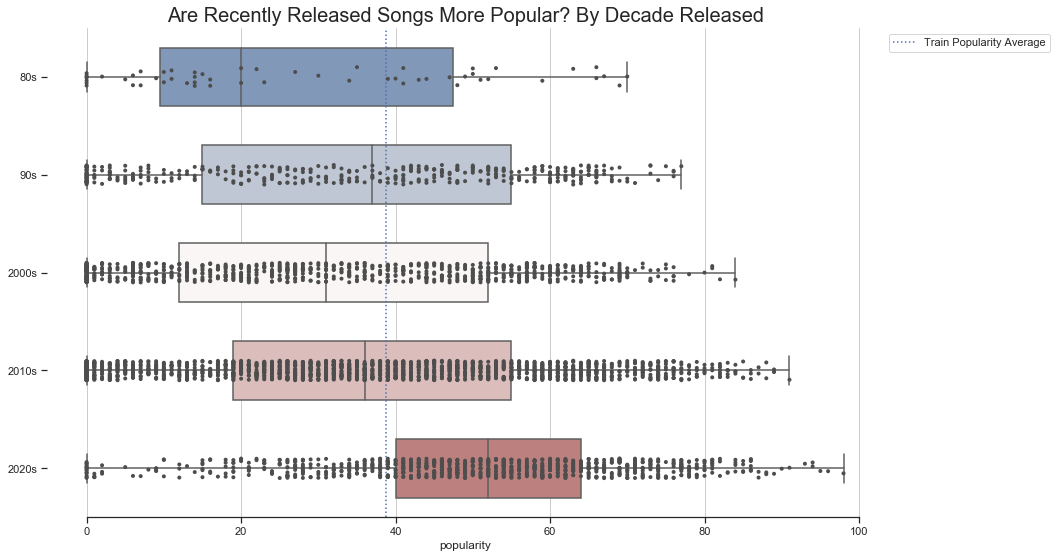

In [75]:
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(15, 9))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="popularity", y="decade", data=train,
            whis=[0, 100], width=.6, palette="vlag")

# reference line for overall popularity average
plt.axvline(train.popularity.mean(), linestyle=':',label='Train Popularity Average')

plt.title('Are Recently Released Songs More Popular? By Decade Released', size=20)

# Add in points to show each observation
sns.stripplot(x="popularity", y="decade", data=train,
              size=4, color=".3", linewidth=0)

plt.legend(bbox_to_anchor=(1,1), loc="upper left")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

Notes:
- only 55 observations in the 80s decade
- The 80s and 2000s are the only deades with a median below the overall popularity average
- Songs released in 2020 have the highest median

## Statistically Testing Release Date vs. Popularity

In [24]:
# calculating an alpha level
n = train.shape[0]     # number of observations
degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
conf_interval = .95 # desired confidence interval
a = 1 - conf_interval
print('Hypothesis Testing Alpha:',round(a,2))

Hypothesis Testing Alpha: 0.05


1. Peirson's Correlation Test
    - checks if two samples are linearly correlated
    - uses two continuous variables
    - will use release year and popularity

#### Popularity vs. Release Year
Null hypothesis: There is no linear correlation between song popularity and release year.    

Alternative hypotesis: There is a linear correlation between song popularity and release year. For example, songs with newer release dates have higher popularity.

In [25]:
from scipy import stats

# determining correlation of two continuous values: popularity and release year
corr, p = stats.pearsonr(train.release_year, train.popularity)

print('The correlation coefficient of train release year vs. popularity:', round(corr,4))
print('The p-value of the coefficient:', round(p,4))
print('Is p-value less than alpha?', p < a)

The correlation coefficient of train release year vs. popularity: 0.2158
The p-value of the coefficient: 0.0
Is p-value less than alpha? True


Because p is low (less than alpha), we can reject the null hypothesis. There is a significant linear correlation between release year and popularity. With the coefficient being positive, we can say this correlation is positive and that as release year increases (closer to current year) the song popularity increases.

# Visualizing Danceability vs. Popularity

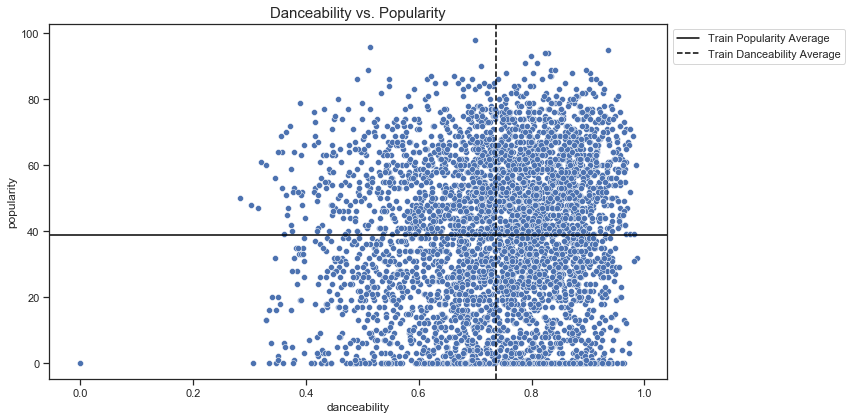

In [108]:
# visualizing each observation by release date and popularity
plt.figure(figsize=(12,6))

sns.scatterplot(x=train.danceability, y=train.popularity)
# reference line for overall popularity average
plt.axhline(train.popularity.mean(),label='Train Popularity Average', color='black')
plt.axvline(train.danceability.mean(), linestyle='--',label='Train Danceability Average', color='black')

plt.title('Danceability vs. Popularity', size=15)

plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.tight_layout()

In [70]:
# bin danceability for better visualizing
train['dance_bins'] = pd.qcut(x=train.danceability, q=3, labels=['low','medium','high'])

danaceability bins for equal cuts
- [(-0.001, 0.696] < (0.696, 0.809] < (0.809, 0.986]]
- low, medium, high

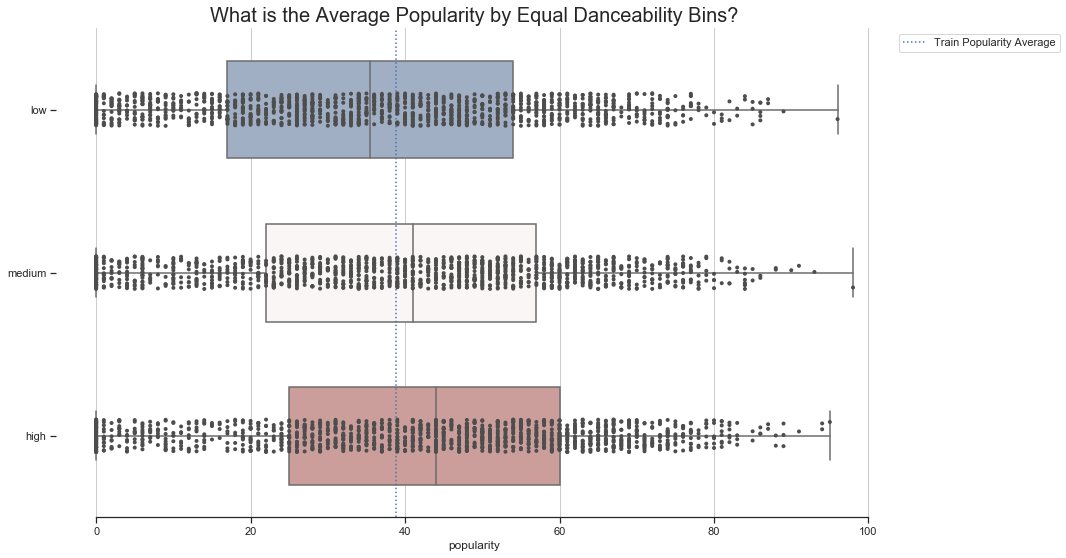

In [109]:
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(15, 9))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="popularity", y="dance_bins", data=train,
            whis=[0, 100], width=.6, palette="vlag")

# reference line for overall popularity average
plt.axvline(train.popularity.mean(), linestyle=':',label='Train Popularity Average')

plt.title('What is the Average Popularity by Equal Danceability Bins?', size=20)

# Add in points to show each observation
sns.stripplot(x="popularity", y="dance_bins", data=train,
              size=4, color=".3", linewidth=0)

plt.legend(bbox_to_anchor=(1,1), loc="upper left")

# Tweak the visual presentation
plt.ylabel('Dancability Bin')
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


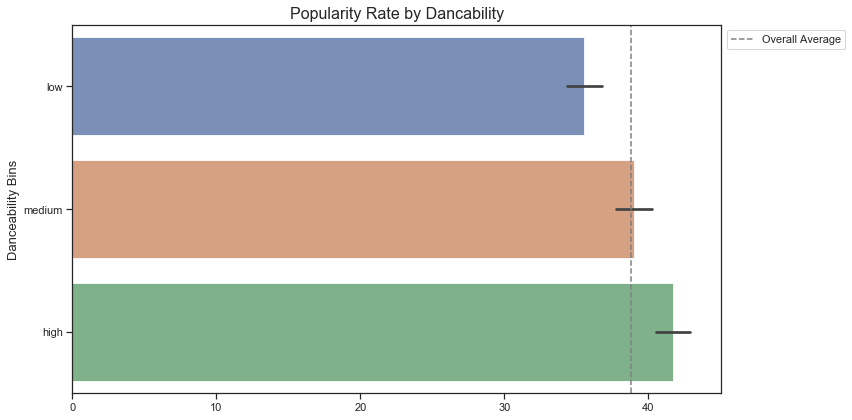

In [111]:
# to plot reference line of overall train average popularity
popularity_rate = train.popularity.mean()

plt.figure(figsize=(12,6))

# plots the average of each features subgroups as bar plots
sns.barplot('popularity', 'dance_bins', data=train, alpha=.8)
plt.xlabel('')
plt.ylabel('Danceability Bins', size=13)
plt.title('Popularity Rate by Dancability', size=16)
plt.axvline(popularity_rate, ls='--', color='grey', label='Overall Average')

plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.tight_layout()

### Statistically Test
- Danceability vs. Popularity
- Two continuous variables - peirson's coefficient correlation test

In [77]:
# determining correlation of two continuous values: popularity and release year
corr, p = stats.pearsonr(train.danceability, train.popularity)

print('The correlation coefficient of train release year vs. popularity:', round(corr,4))
print('The p-value of the coefficient:', round(p,4))
print('Is p-value less than alpha?', p < a)

The correlation coefficient of train release year vs. popularity: 0.1098
The p-value of the coefficient: 0.0
Is p-value less than alpha? True


### Conclusions
- release_year significantly influences a song's popularity
- danceability has a lower but still positive correlation with popularity
    - not as strong a correlation as release year

### Next Steps
- clean up visuals
- create clusters to visualize and test significance